In [1]:
# Imports
import os
import sys
import glob

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Local imports
#sys.path.append("/home/users/benhutch/skill-maps")
sys.path.append("C:/Users/Ben Hutchins/OneDrive - University of Reading/Documents/GitHub/skill-maps-1")
import dictionaries as dicts

# # Import functions from skill-maps
#sys.path.append("/home/users/benhutch/skill-maps/python")
sys.path.append("C:/Users/Ben Hutchins/OneDrive - University of Reading/Documents/GitHub/skill-maps-1/python")
# import functions as fnc
import plotting_functions as plt_fnc

# Import functions from plot_init_benefit
#sys.path.append("/home/users/benhutch/skill-maps/rose-suite-matching")
sys.path.append("C:/Users/Ben Hutchins/OneDrive - University of Reading/Documents/GitHub/skill-maps-1/rose-suite-matching")
import plot_init_benefit as pib_fnc

In [3]:
# Set up the arguments
variable = "tas"
region = "global"
season = "JJA"
forecast_range = "2-9"
method = "lagged"
no_bootstraps = 10 # test case
bootstrap_base_dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping"
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# Define the seasons_list
seasons_list = ["DJFM", "MAM", "JJA", "SON"]
method_list = ["raw", "lagged", "nao_matched"]

In [4]:
# # Create an empty list to store the paths
# paths_list = []

# # Loop over the seasons and generate the paths
# for season in seasons_list:
#     # Form the path
#     path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
#                 f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"

#     # Append the path to the list
#     paths_list.append(path)

#     # Print the path
#     print(path)

#     # Check if the path exists
#     if os.path.exists(path):
#         print("Path exists")

#     # print the files in the path
#     files = glob.glob(f"{path}/*")

#     # Print the files
#     print(files)

In [5]:
# Form the paths for the data using the method_list
paths_list = []

# Loop over the methods and generate the paths
for method in method_list:
    
    if method == "raw":
        no_bootstraps = 1
    else:
        no_bootstraps = 1

    # Form the path
    path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
                f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"
    
    # Check if the path exists
    if os.path.exists(path):
        print("Path exists")

    # Append the path to the list
    paths_list.append(path)

    # print the files in the path
    files = glob.glob(f"{path}/*")

    # Print the files
    print(files)

Path exists
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/JJA/2-9/raw/no_bootstraps_1/corr10_max_tas_global_JJA_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/JJA/2-9/raw/no_bootstraps_1/corr10_min_tas_global_JJA_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/JJA/2-9/raw/no_bootstraps_1/corr10_p_tas_global_JJA_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/JJA/2-9/raw/no_bootstraps_1/corr10_tas_global_JJA_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/JJA/2-9/raw/no_bootstraps_1/corr1_max_tas_global_JJA_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/JJA/2-9/raw/no_bootstraps_1/corr1_min_tas_global_JJA_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/JJA/2-9/raw/no_bootstraps_1/corr1_p_tas_global_JJA_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/JJA/2-9/raw/no_bootstraps_1/corr1_tas_global_JJA_2-9.n

In [6]:
# print(paths_list)

In [7]:
# Create an empty list to store the dictionaries
values_list = []

# Loop over the paths and extract the values for each path
for path in paths_list:
    # Extract the values from the .txt files
    values = pib_fnc.extract_values_from_txt(path, variable)

    # Append the resulting dictionary to the list
    values_list.append(values)

# Print the list of dictionaries
print(values_list)


[{'nens1': array(160), 'nens2': array(177), 'start_year': 1967, 'end_year': 2011}, {'nens1': array(640), 'nens2': array(177), 'start_year': 1967, 'end_year': 2011}, {'nens1': array(20), 'nens2': array(177), 'start_year': 1970, 'end_year': 2011}]


In [8]:
# Create an empty list to store the arrays
arrays_list = []

# Loop over the paths and load the arrays for each path
for path in paths_list:
    # Load the arrays from the .npy file
    arrays = pib_fnc.load_arrays_from_npy(path, variable)

    # Append the resulting dictionary to the list
    arrays_list.append(arrays)


# Print the list of arrays
print(arrays_list)

[{'corr1': array([[ 0.18904873,  0.18916392,  0.18875722, ...,  0.18874422,
         0.1888358 ,  0.18926041],
       [ 0.14026594,  0.13264782,  0.12412156, ...,  0.1550215 ,
         0.14985639,  0.14247729],
       [ 0.4407946 ,  0.40373655,  0.50257959, ...,  0.45524648,
         0.3685022 ,  0.27298588],
       ...,
       [-0.21231226, -0.2529724 , -0.26056406, ..., -0.27285015,
        -0.25613785, -0.22890367],
       [ 0.13288614,  0.16081317,  0.16962075, ...,  0.03779765,
         0.02849424,  0.07872524],
       [ 0.09998347,  0.14975493,  0.1872883 , ...,  0.0545585 ,
         0.06031685,  0.07892047]]), 'corr1_p': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'partial_r': array([[ 0.44904507,  0.44909701,  0.44788569, ...,  0.44805859,
         0.44794088,  0.45058982],
       [ 

plotting index:  0  for method:  raw
Not skipping the first three years of the time series
plotting index:  1  for method:  lagged
Skipping the first three years of the time series
plotting index:  2  for method:  nao_matched
Not skipping the first three years of the time series


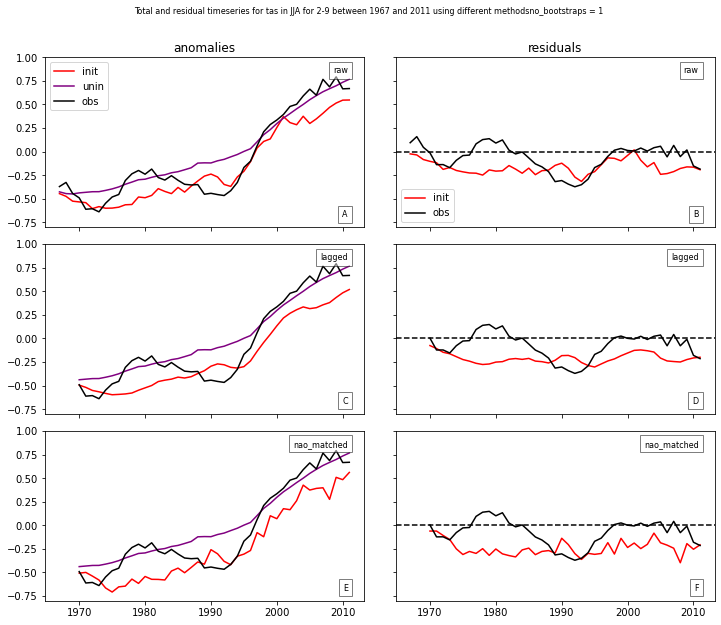

<Figure size 432x288 with 0 Axes>

In [9]:
# Test the time series function
# TODO: add the correlation values r = ? for example, to the plot
plt_fnc.plot_diff_methods_same_season_var_timeseries(arrays_list,
                                                    values_list,
                                                    variable,
                                                    season,
                                                    forecast_range,
                                                    method_list,
                                                    no_bootstraps,
                                                    plots_dir,
                                                    gridbox=dicts.spna_grid,
                                                    figsize_x=12,
                                                    figsize_y=10)

In [ ]:
# # # set up a plots directory
# plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# # Now use the updated plotting function to plot the results
# plt_fnc.plot_raw_init_impact_subplots(arrays_list, values_list, variable,
#                                       seasons_list, forecast_range, method,
#                                       no_bootstraps, plots_dir)

plotting index:  0  for method:  raw
plotting index:  1  for method:  lagged
plotting index:  2  for method:  nao-matched


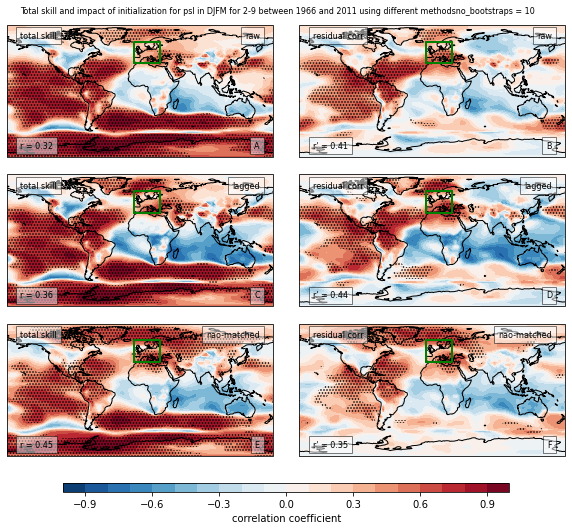

In [ ]:
# Call the function to plot the subplots for the different methods
plt_fnc.plot_different_methods_same_season_var(arrays_list, values_list, variable,
                                                season, forecast_range, method_list,
                                                no_bootstraps, plots_dir,
                                                gridbox=dicts.central_europe_grid,
                                                figsize_x=10, figsize_y=10)

In [7]:
# # Define a function to process the initialization benefit
# # Set up the args first
# # sigo = arrays["sigo"] ; sigo_resid = arrays["sigo_resid"]

# # Extract the arrays
# partial_r = arrays["partial_r"] ; corr1 = arrays["corr1"] 

# # # Process the initialization benefit
# # init_impact = pib_fnc.calculate_init_benefit(partial_r, sigo_resid,
# #                                              corr1, sigo)

['/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/nens1_psl_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/nens2_psl_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/start_end_years_psl_global_DJFM_2-9.txt']
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/nens1_psl_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/nens2_psl_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/start_end_years_psl_global_DJFM_2-9.txt
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_10/corr10_max_psl_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/lagged/no_bootstraps_1

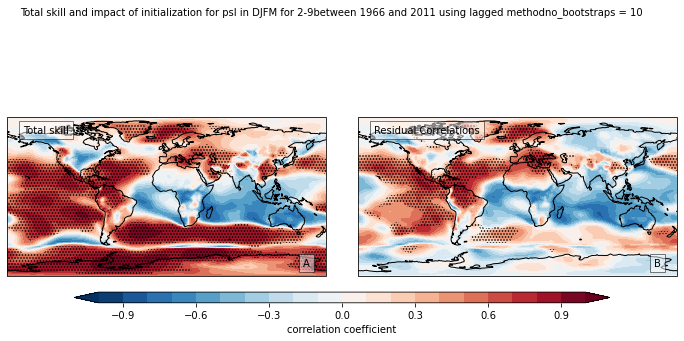

In [4]:
method = "lagged"
# Now we want to plot the initialization benefit alongside the raw field
# With significance levels shown by the stippling
# Extract the args
# Use the function to extract the arrays
path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
                f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"

# Use this path to extract the values from the txt file
values = pib_fnc.extract_values_from_txt(path, variable)

# Use this path to extract the arrays from the npy file
arrays = pib_fnc.load_arrays_from_npy(path, variable)

# Extract corr1 and partial_r
partial_r = arrays["partial_r"] ; corr1 = arrays["corr1"]
corr1_p = arrays["corr1_p"] ; partial_r_p = arrays["partial_r_p"]

# extract the values
nens1 = values["nens1"] ; nens2 = values["nens2"]
start_year = values["start_year"] ; end_year = values["end_year"]

# set up a plots directory
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# If this directory doesn't exist, create it
if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)

# run the function
plt_fnc.plot_raw_init_impact(corr1, corr1_p, partial_r, partial_r_p,
                                variable, season, forecast_range, method,
                                no_bootstraps, nens1, nens2, start_year,
                                end_year, plots_dir)

['/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/nens1_psl_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/nens2_psl_global_DJFM_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/start_end_years_psl_global_DJFM_2-9.txt']
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/nens1_psl_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/nens2_psl_global_DJFM_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/start_end_years_psl_global_DJFM_2-9.txt
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/DJFM/2-9/nao-matched/no_bootstraps_10/corr10_max_psl_global_DJFM_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/glo

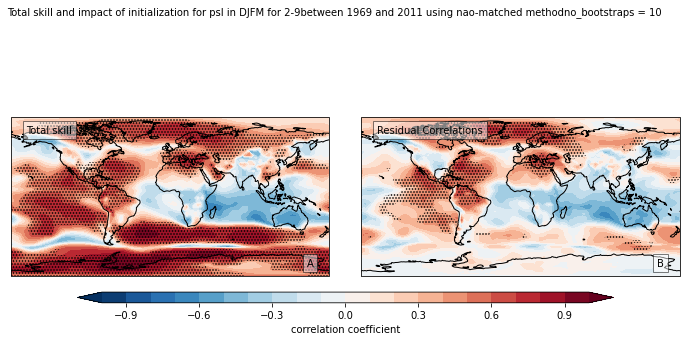

In [5]:
# Now for the other method
method = "nao-matched"

# Do the same thing
# Use the function to extract the arrays
path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
                f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"

# Use this path to extract the values from the txt file
values = pib_fnc.extract_values_from_txt(path, variable)

# Use this path to extract the arrays from the npy file
arrays = pib_fnc.load_arrays_from_npy(path, variable)

# Extract corr1 and partial_r
partial_r = arrays["partial_r"] ; corr1 = arrays["corr1"]
corr1_p = arrays["corr1_p"] ; partial_r_p = arrays["partial_r_p"]

# extract the values
nens1 = values["nens1"] ; nens2 = values["nens2"]
start_year = values["start_year"] ; end_year = values["end_year"]

# set up a plots directory
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# If this directory doesn't exist, create it
if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)
    

# run the function
plt_fnc.plot_raw_init_impact(corr1, corr1_p, partial_r, partial_r_p,
                                variable, season, forecast_range, method,
                                no_bootstraps, nens1, nens2, start_year,
                                end_year, plots_dir)


['C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\rsds\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\nens1_rsds_global_DJFM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\rsds\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\nens2_rsds_global_DJFM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\rsds\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\start_end_years_rsds_global_DJFM_2-9.txt']
['C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\rsds\\global\\MAM\\2-9\\nao_matched\\no_bootstraps_1000\\nens1_rsds_global_MAM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\rsds\\global\\MAM\\2-9\\nao_matched\\no_bootstraps_1000\\nens2_rsds_global_MAM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\rsd

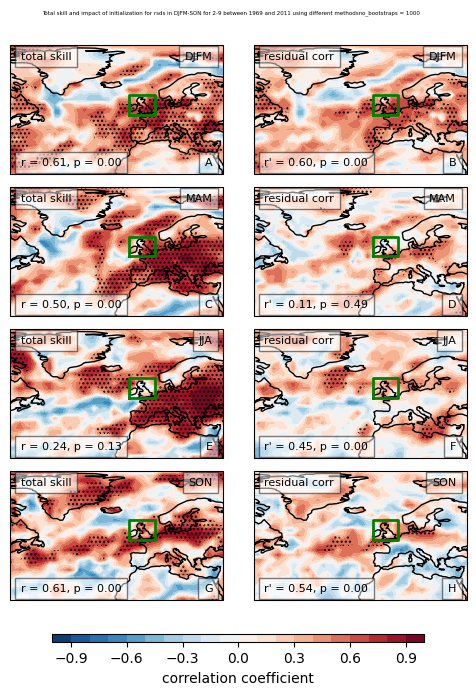

In [13]:
# Call the function load_files_and_plot
# With plot_different_methods = False
# and plot_different_seasons = True
seasons_list = ["DJFM", "MAM", "JJA", "SON"]
methods_list = ["raw", "lagged", "nao_matched"]
region_name = "north-atlantic"

bootstrap_base_dir = "/c/Users/Ben Hutchins/OneDrive - University of Reading/back_up_data/bootstrapping"
plots_dir = "C:/Users/Ben Hutchins/OneDrive - University of Reading/backup_plots/prop_plots"

# Call the function
plt_fnc.load_files_and_plot(variable='rsds',
                            region='global',
                            season=None,
                            forecast_range='2-9',
                            methods_list=['nao_matched'],
                            no_bootstraps=1000,
                            plots_dir=plots_dir,
                            bootstrap_base_dir=bootstrap_base_dir,
                            gridbox=dicts.uk_grid,
                            figsize_x=6, figsize_y=9,
                            plot_gridbox=dicts.north_atlantic_grid_plot,
                            region_name=region_name,
                            plot_different_methods=False,
                            plot_different_seasons=True,
                            seasons_list=seasons_list)

['C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\tas\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\nens1_tas_global_DJFM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\tas\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\nens2_tas_global_DJFM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\tas\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\start_end_years_tas_global_DJFM_2-9.txt']
['C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\tas\\global\\MAM\\2-9\\nao_matched\\no_bootstraps_1000\\nens1_tas_global_MAM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\tas\\global\\MAM\\2-9\\nao_matched\\no_bootstraps_1000\\nens2_tas_global_MAM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\tas\\global\\

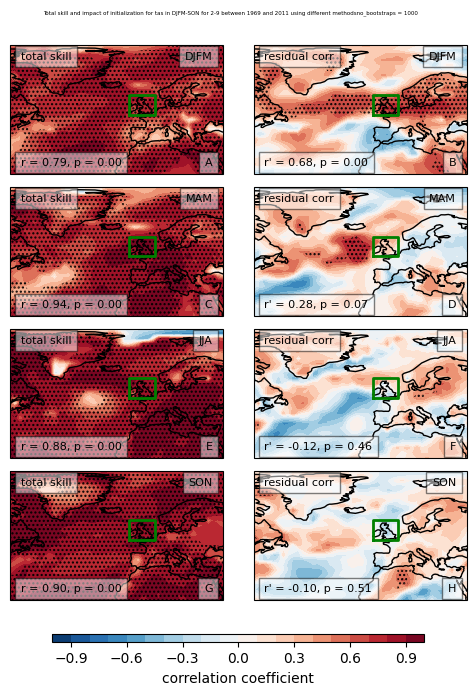

In [11]:
# How about plotting the different seasons and the same method
# for tas
# Call the function
plt_fnc.load_files_and_plot(variable='tas',
                            region='global',
                            season=None,
                            forecast_range='2-9',
                            methods_list=['nao_matched'],
                            no_bootstraps=1000,
                            plots_dir=plots_dir,
                            bootstrap_base_dir=bootstrap_base_dir,
                            gridbox=dicts.uk_grid,
                            figsize_x=6, figsize_y=9,
                            plot_gridbox=dicts.north_atlantic_grid_plot,
                            region_name=region_name,
                            plot_different_methods=False,
                            plot_different_seasons=True,
                            seasons_list=seasons_list)

['C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\sfcWind\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\nens1_sfcWind_global_DJFM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\sfcWind\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\nens2_sfcWind_global_DJFM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\sfcWind\\global\\DJFM\\2-9\\nao_matched\\no_bootstraps_1000\\start_end_years_sfcWind_global_DJFM_2-9.txt']
['C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\sfcWind\\global\\MAM\\2-9\\nao_matched\\no_bootstraps_1000\\nens1_sfcWind_global_MAM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\back_up_data\\bootstrapping\\sfcWind\\global\\MAM\\2-9\\nao_matched\\no_bootstraps_1000\\nens2_sfcWind_global_MAM_2-9.txt', 'C:\\Users\\Ben Hutchins\\OneDrive - University of Reading\\ba

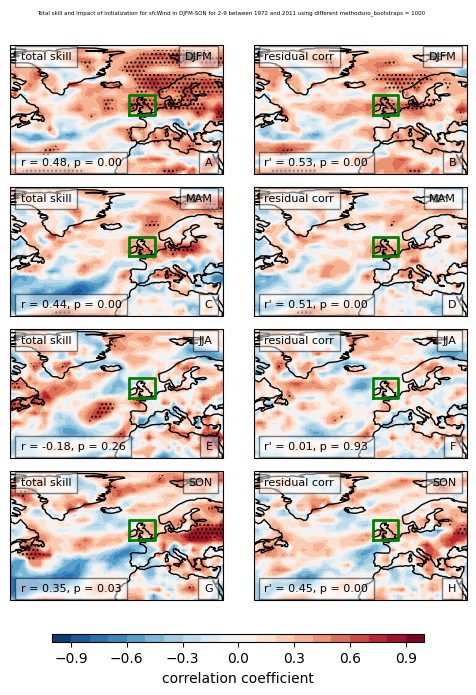

In [16]:
# DO the same through the seasons for sfcWind
# Call the function
plt_fnc.load_files_and_plot(variable='sfcWind',
                            region='global',
                            season=None,
                            forecast_range='2-9',
                            methods_list=['nao_matched'],
                            no_bootstraps=1000,
                            plots_dir=plots_dir,
                            bootstrap_base_dir=bootstrap_base_dir,
                            gridbox=dicts.uk_grid,
                            figsize_x=6, figsize_y=9,
                            plot_gridbox=dicts.north_atlantic_grid_plot,
                            region_name=region_name,
                            plot_different_methods=False,
                            plot_different_seasons=True,
                            seasons_list=seasons_list)

In [18]:
# TODO: Fix this for ua/psl once JASMIN back up running again
# Same but for psl
# and the NAO nodes
# Call the function
plt_fnc.load_files_and_plot(variable='ua',
                            region='global',
                            season=None,
                            forecast_range='2-9',
                            methods_list=['raw'],
                            no_bootstraps=1000,
                            plots_dir=plots_dir,
                            bootstrap_base_dir=bootstrap_base_dir,
                            gridbox=dicts.nao_skill_grid,
                            figsize_x=6, figsize_y=9,
                            plot_gridbox=dicts.north_atlantic_grid_plot,
                            region_name=region_name,
                            plot_different_methods=False,
                            plot_different_seasons=True,
                            seasons_list=seasons_list)

AssertionError: Path C:\Users\Ben Hutchins\OneDrive - University of Reading\back_up_data\bootstrapping\ua\global\DJFM\2-9\raw\no_bootstraps_1000 does not exist for season DJFM and no_bootstraps 1000